In [6]:
#RUN ME BEFORE ANYTHING ELSE!!! I import all of the required modules and functions!!
import matplotlib.pyplot as plt
import numpy as np
from photutils import centroid_com
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from scipy import ndimage

def open_img(path, ext = 'sci'):
    #shield against non-string inputs
    path = str(path)
    ext_dict = {
        'sci': 1, 
        }
    if ext in ext_dict:
        ext = ext_dict[ext]
        
    
    file = get_pkg_data_filename(path)
    fitsdata = fits.open(file)
    imgdata = fits.getdata(file, ext=1)
    fitshdr = fitsdata[0].header
    scihdr = fitsdata[1].header
    return imgdata, fitshdr, scihdr

def rotate_img(img, angle, pivot):
    padX = [img.shape[1] - pivot[0], pivot[0]]
    padY = [img.shape[0] - pivot[1], pivot[1]]
    imgP = np.pad(img, [padY, padX, [0, 0]], 'constant')
    imgR = ndimage.rotate(imgP, angle, reshape=False)
    return imgR[padY[0] : -padY[1], padX[0] : -padX[1]]

%matplotlib inline
plt.ion()
print('Imported and initialised matplotlib...')
import astropy.io.fits as ast
print('Imported Astropy...')
from MapFunc import *
print('Imported User Defined Functions...')
from tools import *
from tools.image import *
from tools.mapping import *
print("Imported Oliver King's tools, v1.4 ...")
col = 'bone'
xcol = 'red'
lvls = 1000
cmax467 = 0.86
cmin467 = 0.6
mfac467 = 0.88
cmax547 = 1
cmin547 = 0
mfac547 = 0.80
cmax619 = 0.14
cmin619 = 0.07
mfac619 = 0.42
cmax657 = 1
cmin657 = 0
mfac657 = 0.60
cmax727 = 1
cmin727 = 0
mfac727 = 0.30
cmax763 = 1
cmin763 = 0
mfac763 = 0.50
cmax845 = 1
cmin845 = 0
mfac845 = 0.50
print("Graphical Parameters initialised...")
print('All Modules Imported Successfully!')

Imported and initialised matplotlib...
Imported Astropy...
Imported User Defined Functions...
Imported Oliver King's tools, v1.4 ...
Graphical Parameters initialised...
All Modules Imported Successfully!


C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\tools\mapping.py:331: RuntimeWarning: invalid value encountered in sqrt
  z_img = np.sqrt(1 - x_img**2 - y_img**2)
C:\Users\jamie\Documents\Uni Work\Year 4\PA4900 Specialist Research Project\CODE AHHHHHHH\Neptune from Scratch\IMAGE MAPPING\Final Mappings\MapFunc.py:117: RuntimeWarning: invalid value encountered in power
  img_corr = img/((mu**(k-1))*(mu0**k))


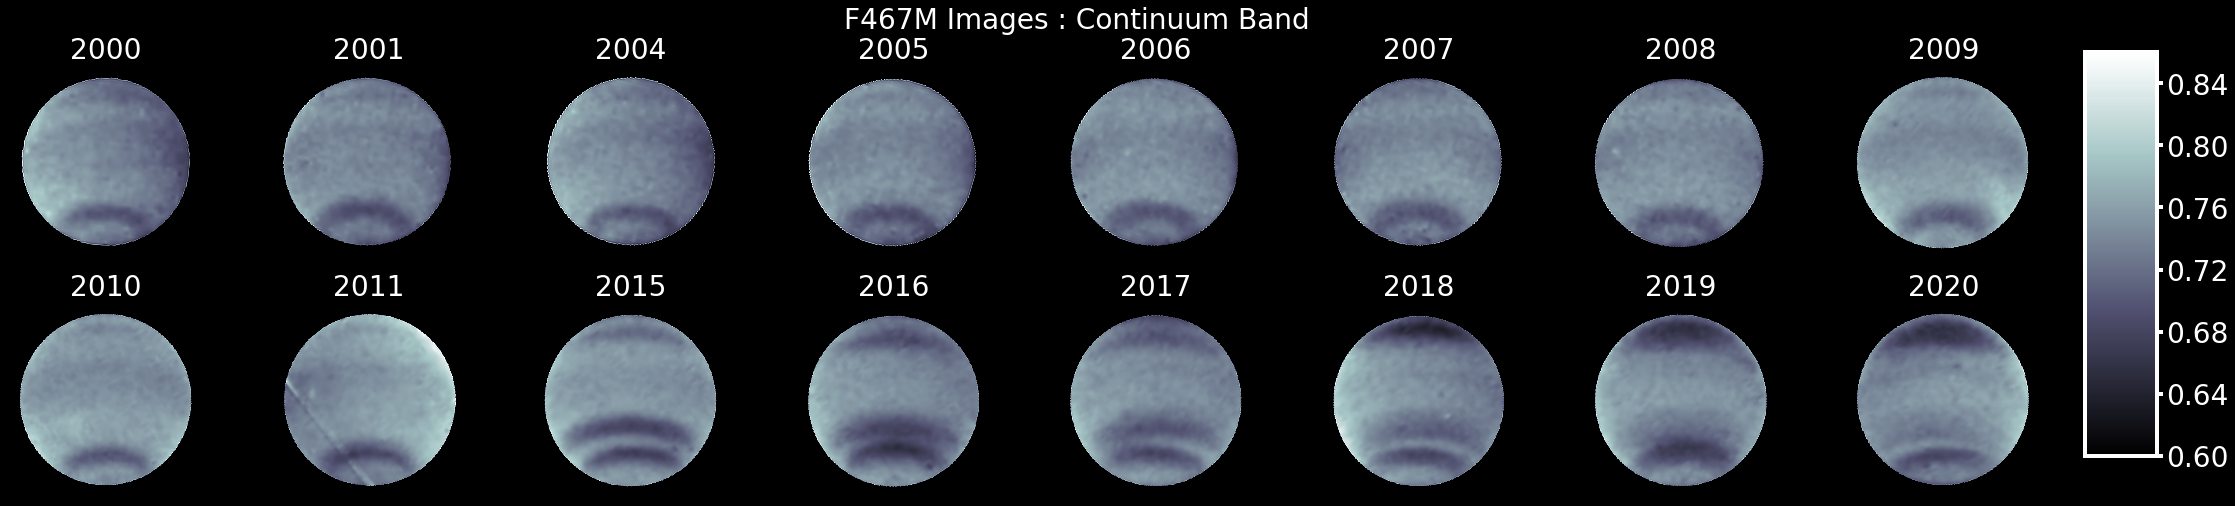

In [2]:
fig = plt.figure(figsize=(40,8))
fig.patch.set_facecolor('black')
plt.suptitle('F467M Images : Continuum Band', fontsize = 28,color="white")

img, hdr, scihdr = open_img('data/2000/467/hst_08634_08_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, PlateScale = 0.05, Filter = '467')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(291)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2000',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2001/467/hst_08634_14_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, PlateScale = 0.05, Filter = '467')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(292)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2001',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2004/467/hst_10170_15_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, PlateScale = 0.05, Filter = '467')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(293)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2004',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2005/467/hst_10170_11_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, PlateScale = 0.05, Filter = '467')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(294)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2005',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2006/467/hst_10534_19_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, PlateScale = 0.05, Filter = '467')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(295)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2006',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2007/467/hst_11156_03_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, PlateScale = 0.05, Filter = '467')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(296)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2007',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2008/467/hst_11156_47_wfpc2_f467m_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, PlateScale = 0.05, Filter = '467')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(297)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2008',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2009/467/ib2s04jvq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(298)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2009',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2010/467/ib2s16xsq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,10)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2010',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2011/467/ibol04etq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,11)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2011',fontsize=28,color="white")
ax1.axis('off') 

img, hdr, scihdr = open_img('data/2015/467/icpf30gqq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,12)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2015',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2016/467/icwy24jbq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,13)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2016',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2017/467/id9922buq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,14)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2017',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2018/467/idg263cvq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,15)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2018',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2019/467/iduy25mnq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,16)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2019',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2020/467/ie0l24pdq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac467, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,17)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin467,cmax467)
plt.title('2020',fontsize=28,color="white")
ax1.axis('off')

fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.85, 0.2, 0.025, 0.7])
cbar = fig.colorbar(im1, cax=cbar_ax)
plt.yticks(fontsize=28)
cbar.set_ticks([0.6,0.64,0.68,0.72,0.76,0.8,0.84])
cbar_ax.tick_params(axis='y', colors='white',width=4,size=6)
cbar.outline.set_edgecolor('white')
cbar.outline.set_linewidth(4)

plt.savefig('ContinuumBandCompilation.png', bbox_inches = 'tight', facecolor = 'black')
plt.show()
plt.close()

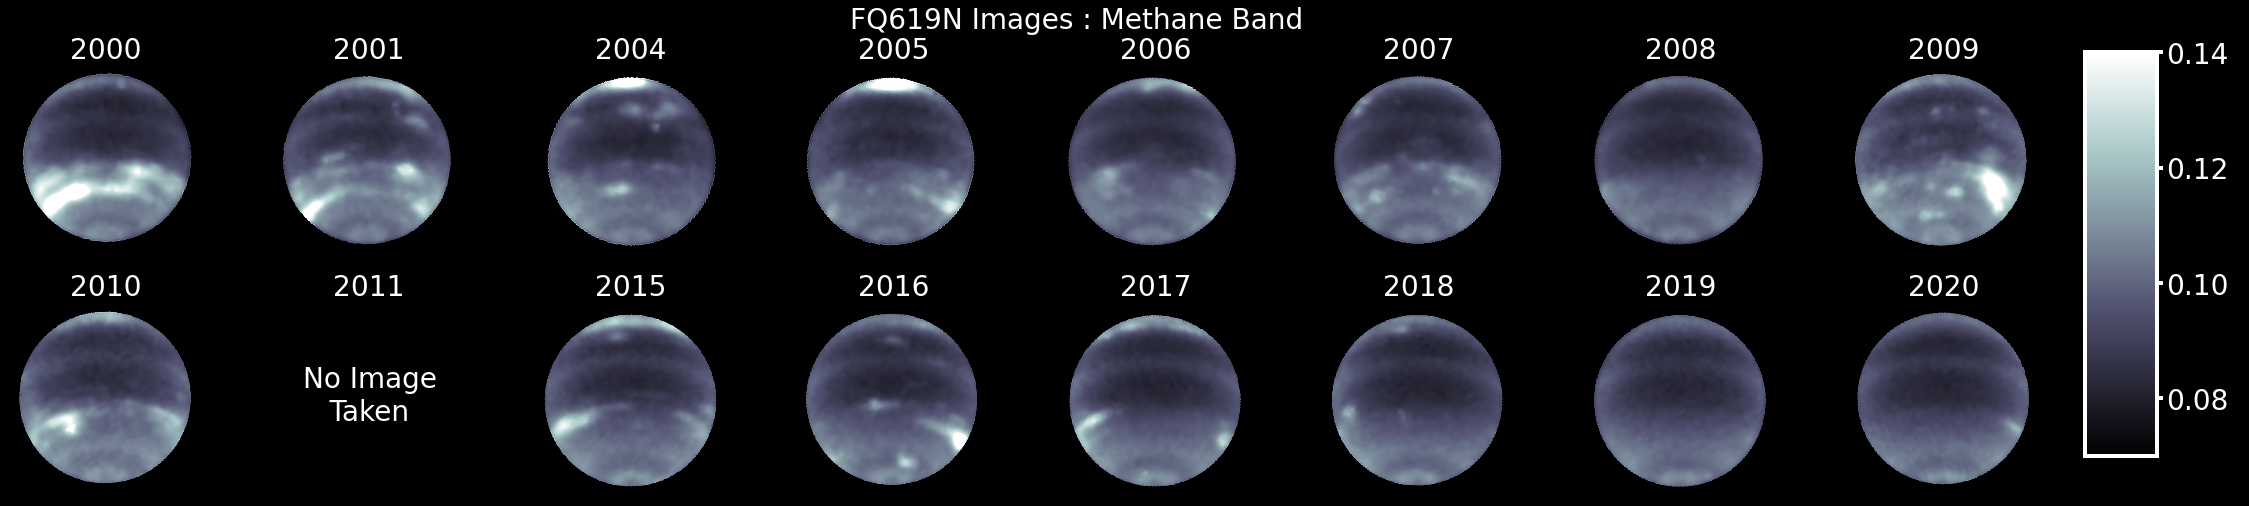

In [7]:
fig = plt.figure(figsize=(40,8))
fig.patch.set_facecolor('black')
plt.suptitle('FQ619N Images : Methane Band', fontsize = 28,color="white")

img, hdr, scihdr = open_img('data/2000/ch4/hst_08634_08_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1710.18, 0.05, Filter = '619')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(291)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2000',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2001/ch4/hst_08634_14_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1710.18, 0.05, Filter = '619')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(292)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2001',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2004/ch4/hst_10170_15_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1710.18, 0.05, Filter = '619')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(293)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2004',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2005/ch4/hst_10170_11_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1710.18, 0.05, Filter = '619')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(294)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2005',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2006/ch4/hst_10534_19_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1710.18, 0.05, Filter = '619')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(295)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2006',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2007/ch4/hst_11156_03_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1710.18, 0.05, Filter = '619')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(296)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2007',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2008/ch4/hst_11156_47_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1710.18, 0.05, Filter = '619')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(297)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2008',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2009/619/ib2s04jzq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1707.85)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(298)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2009',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2010/619/ib2s16xwq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1707.85)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,10)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2010',fontsize=28,color="white")
ax1.axis('off')

# img, hdr, scihdr = open_img('data/2011/619/ibol04etq_drz.fits')
# eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
# IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1707.85)
# img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
# pltscl = pltscl/4
# img = img*IF
# rad = float(eph['ang_width'])/(2*pltscl)
# img, y, x = circ(img,rad)
# img, planicentre = get_planicentre(img,rad)
# img = minnaert(img, planicentre, mfac619, eph)
# ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
# while ang_corr >= 360 or ang_corr < 0:
#     if ang_corr >=360:
#         ang_corr = ang_corr - 360
#     elif ang_corr < 0:
#         ang_corr = ang_corr + 360
# outdisk = np.isnan(img)
# img[np.isnan(img)] = 0
# img = ndimage.rotate(img, ang_corr, reshape=False)
# outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,11)
# im1 = ax1.imshow(img, cmap=col)
# im1.set_clim(cmin619,cmax619)
plt.title('2011',fontsize=28,color="white")
ax1.text(0.2,0.4,'No Image\n   Taken',color='white',fontsize=28)
ax1.axis('off') 

img, hdr, scihdr = open_img('data/2015/619/icpf30h1q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1707.85)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,12)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2015',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2016/619/icwy24jyq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1707.85)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,13)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2016',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2017/619/id9922c9q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1707.85)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,14)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2017',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2018/619/idg263dbq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1707.85)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,15)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2018',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2019/619/iduy25myq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1707.85)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,16)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2019',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2020/619/ie0l24poq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 1707.85)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)
img = minnaert(img, planicentre, mfac619, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,17)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin619,cmax619)
plt.title('2020',fontsize=28,color="white")
ax1.axis('off')

fig.subplots_adjust(right=0.93)
cbar_ax2 = fig.add_axes([0.85, 0.2, 0.025, 0.7])
cbar = fig.colorbar(im1, cax=cbar_ax2,label='colbar2')
plt.yticks(fontsize=28)
cbar.set_ticks([0.06,0.08,0.10,0.12,0.14])
cbar_ax2.tick_params(axis='y', colors='white',width=4,size=6)
cbar.outline.set_edgecolor('white')
cbar.outline.set_linewidth(4)

plt.savefig('MethaneBandCompilation.png', bbox_inches = 'tight', facecolor = 'black')
plt.show()
plt.close()

URLError: <urlopen error Unable to open any source! Exceptions were {'http://data.astropy.org/data/2009/547/ib2s04jzq_drz.fits': <HTTPError 404: 'Not Found'>, 'http://www.astropy.org/astropy-data/data/2009/547/ib2s04jzq_drz.fits': <HTTPError 404: 'Not Found'>}>

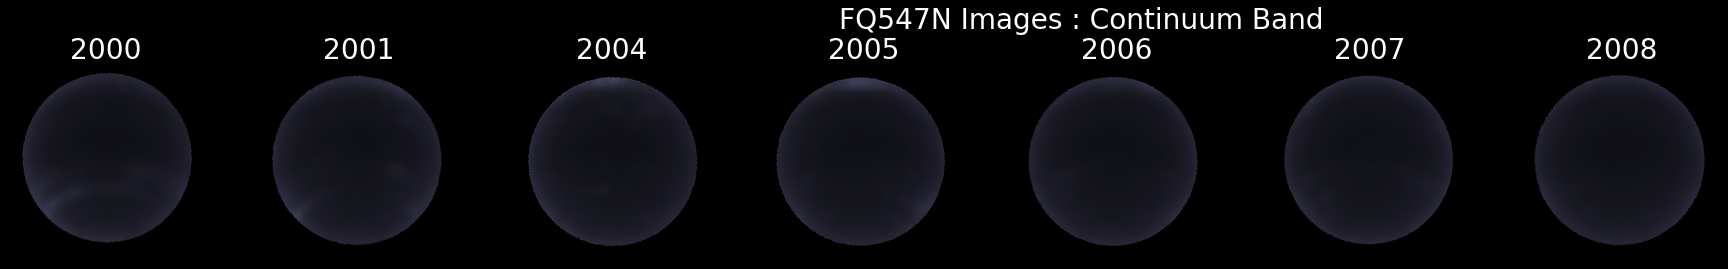

In [5]:
fig = plt.figure(figsize=(40,8))
fig.patch.set_facecolor('black')
plt.suptitle('FQ547N Images : Continuum Band', fontsize = 28,color="white")

img, hdr, scihdr = open_img('data/2000/ch4/hst_08634_08_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, 0.05, Filter = '547')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(291)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2000',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2001/ch4/hst_08634_14_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, 0.05, Filter = '547')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(292)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2001',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2004/ch4/hst_10170_15_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, 0.05, Filter = '547')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(293)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2004',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2005/ch4/hst_10170_11_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, 0.05, Filter = '547')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(294)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2005',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2006/ch4/hst_10534_19_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, 0.05, Filter = '547')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(295)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2006',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2007/ch4/hst_11156_03_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, 0.05, Filter = '547')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(296)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2007',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2008/ch4/hst_11156_47_wfpc2_fqch4n15_pc_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.07, 0.05, Filter = '547')
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(297)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2008',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2009/547/ib2s04jzq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(298)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2009',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2010/547/ib2s16xwq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,10)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2010',fontsize=28,color="white")
ax1.axis('off')

# img, hdr, scihdr = open_img('data/2011/547/ibol04etq_drz.fits')
# eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
# IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
# img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
# pltscl = pltscl/4
# img = img*IF
# rad = float(eph['ang_width'])/(2*pltscl)
# img, y, x = circ(img,rad)
# img, planicentre = get_planicentre(img,rad)
# img = minnaert(img, planicentre, mfac547, eph)
# ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
# while ang_corr >= 360 or ang_corr < 0:
#     if ang_corr >=360:
#         ang_corr = ang_corr - 360
#     elif ang_corr < 0:
#         ang_corr = ang_corr + 360
# outdisk = np.isnan(img)
# img[np.isnan(img)] = 0
# img = ndimage.rotate(img, ang_corr, reshape=False)
# outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,11)
# im1 = ax1.imshow(img, cmap=col)
# im1.set_clim(cmin547,cmax547)
plt.title('2011',fontsize=28,color="white")
ax1.text(0.2,0.4,'No Image\n   Taken',color='white',fontsize=28)
ax1.axis('off') 

img, hdr, scihdr = open_img('data/2015/547/icpf30h1q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,12)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2015',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2016/547/icwy24jyq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,13)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2016',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2017/547/id9922c9q_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,14)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2017',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2018/547/idg263dbq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,15)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2018',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2019/547/iduy25myq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,16)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(cmin547,cmax547)
plt.title('2019',fontsize=28,color="white")
ax1.axis('off')

img, hdr, scihdr = open_img('data/2020/547/ie0l24poq_drz.fits')
eph = get_ephemerides(target='neptune',loc='hst',epoch=hdr['EXPSTART'])
img = img[200:(img.shape[0]-200),200:(img.shape[1]-200)]
img = tools.image.exp_despike(img)
IF, pltscl = calc_IF(eph['r'], scihdr['PHOTFLAM'], 2019.04)
img = interp_image(img,4) #interpolate image to have higher resolution, rest of the block deals with the consequences of this
pltscl = pltscl/4
img = img*IF
rad = float(eph['ang_width'])/(2*pltscl)
img, y, x = circ(img,rad)
img, planicentre = get_planicentre(img,rad, iterations=2, croppix=1600)
img = minnaert(img, planicentre, mfac547, eph)
ang_corr = -1*(float(scihdr['ORIENTAT'])-float(eph['NPole_ang']))+180
while ang_corr >= 360 or ang_corr < 0:
    if ang_corr >=360:
        ang_corr = ang_corr - 360
    elif ang_corr < 0:
        ang_corr = ang_corr + 360
outdisk = np.isnan(img)
img[np.isnan(img)] = 0
img = ndimage.rotate(img, ang_corr, reshape=False)
outdisk = ndimage.rotate(outdisk, ang_corr, reshape=False)

ax1 = plt.subplot(2,9,17)
im1 = ax1.imshow(img, cmap=col)
im1.set_clim(0.07,cmax547)
plt.title('2020',fontsize=28,color="white")
ax1.axis('off')

fig.subplots_adjust(right=0.93)
cbar_ax2 = fig.add_axes([0.85, 0.2, 0.025, 0.7])
cbar = fig.colorbar(im1, cax=cbar_ax2,label='colbar2')
plt.yticks(fontsize=28)
cbar.set_ticks([0.06,0.08,0.10,0.12,0.14])
cbar_ax2.tick_params(axis='y', colors='white',width=4,size=6)
cbar.outline.set_edgecolor('white')
cbar.outline.set_linewidth(4)

plt.savefig('547BandCompilation.png', bbox_inches = 'tight', facecolor = 'black')
plt.show()
plt.close()